In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data= pd.read_excel('Acoustic_Extinguisher_Fire_Dataset.xlsx')

In [4]:
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [5]:
data.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [6]:
lb = LabelEncoder()

In [7]:
data['FUEL'] = lb.fit_transform(data['FUEL'])

In [8]:
data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1


<Axes: xlabel='DISTANCE', ylabel='count'>

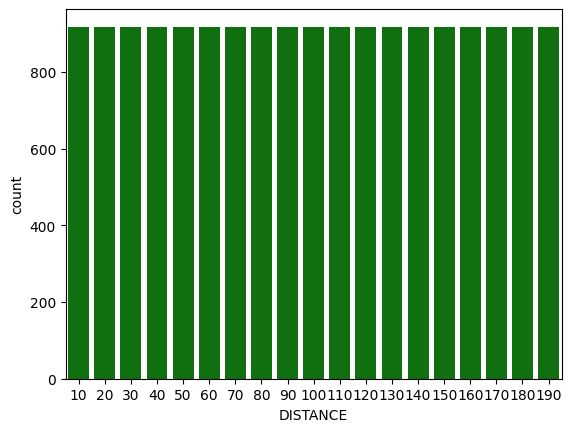

In [9]:
sns.countplot(x='DISTANCE',data=data, color='green')

(array([ 323.,  289., 1309., 4879., 3808., 1071., 4505., 1258.]),
 array([ 72.   ,  77.125,  82.25 ,  87.375,  92.5  ,  97.625, 102.75 ,
        107.875, 113.   ]),
 <BarContainer object of 8 artists>)

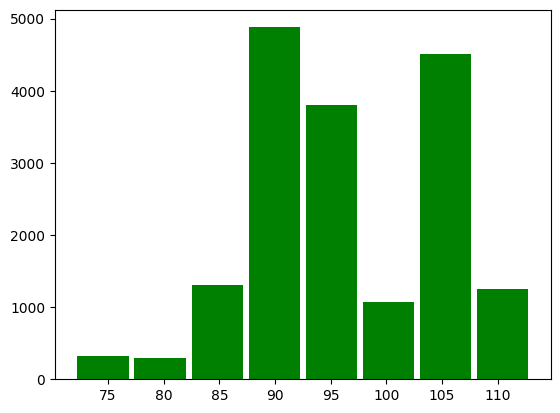

In [10]:
plt.hist(data['DESIBEL'], bins = 8, rwidth = 0.9,color = 'green')

Text(0.5, 1.0, 'Pie chart showing the distribution of Fuel of the Fire')

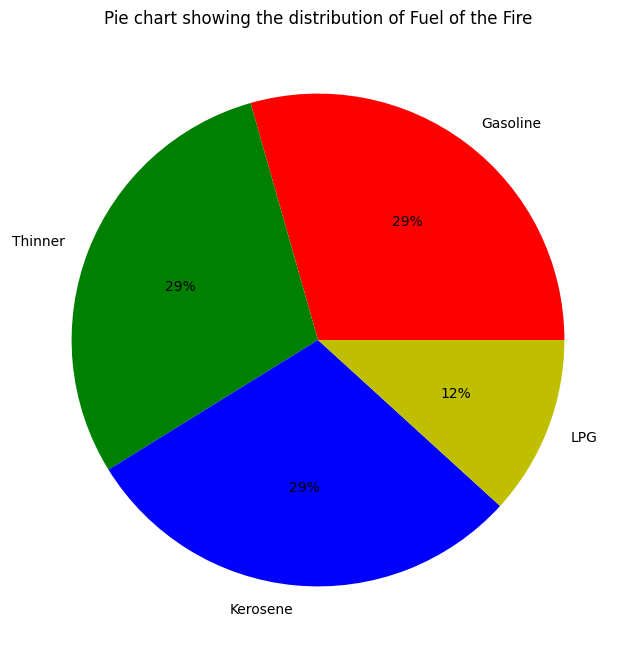

In [11]:
plt.figure(figsize = (8,8))
a = data['FUEL'].value_counts()
plt.pie(x = a, data = data, labels= ['Gasoline', 'Thinner', 'Kerosene', 'LPG'], autopct='%.0f%%', colors = 'rgby')
plt.title("Pie chart showing the distribution of Fuel of the Fire")

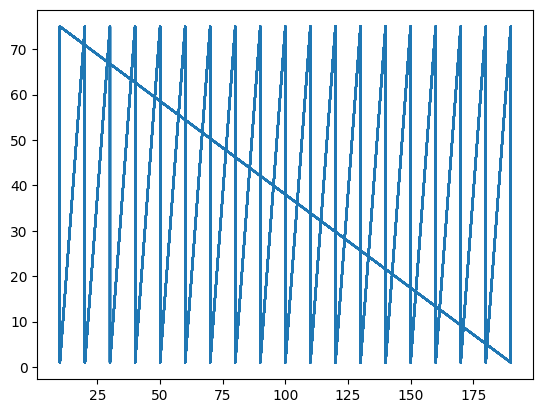

In [12]:
plt.plot (data[ 'DISTANCE'],data['FREQUENCY'])

In [13]:
hm=data.corr()

<Axes: >

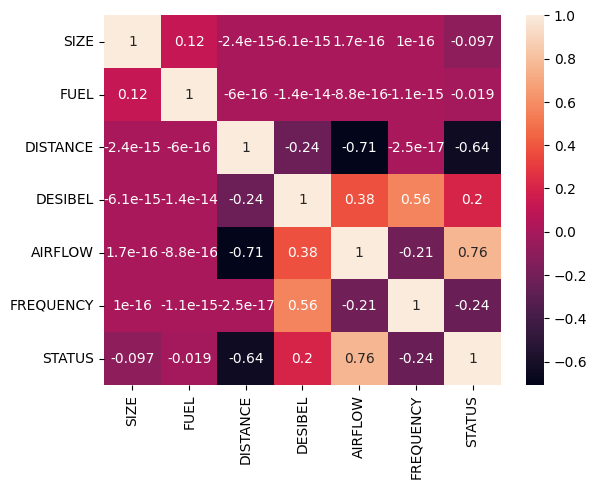

In [14]:
sns.heatmap(hm,annot=True)

In [15]:
X = data.drop('STATUS', axis= 1)
y = data['STATUS']

In [16]:
print(X.shape)
print(y.shape)

(17442, 6)
(17442,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [18]:
knn  =  KNeighborsClassifier()
knn. fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
Svm = SVC()
Svm. fit(X_train, y_train)

SVC()

In [20]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
dt = DecisionTreeClassifier (max_depth= 11)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11)

In [23]:
gb = GradientBoostingClassifier ()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [24]:
def model_evaluation(classifier):

    cm = confusion_matrix(y_test, classifier.predict(X_test))

    counts = [value for value in cm. flatten()]

    labels = [f'{v1}'for v1 in counts]

    labels = np.asarray (labels).reshape(2,2)

    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt= ' ')

    y_pred = classifier.predict(X_test)

    yt_pred = classifier.predict(X_train)

    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Testing Accuracy of the algorithm is', accuracy_score(y_test, y_pred))
    return [(accuracy_score(y_train * 100, yt_pred * 100) * 100), (accuracy_score(y_test * 100, y_pred * 100) *100)]

In [25]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

def model_evaluation(classifier, X_train, y_train, X_test, y_test):
    cm = confusion_matrix(y_test, classifier.predict(X_test))

    counts = [value for value in cm.flatten()]

    labels = [f'{v1}' for v1 in counts]

    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cm, annot=labels, cmap='Greens', fmt=' ')

    y_pred = classifier.predict(X_test)
    yt_pred = classifier.predict(X_train)

    training_accuracy = accuracy_score(y_train, yt_pred)
    testing_accuracy = accuracy_score(y_test, y_pred)

    print('The Training Accuracy of the algorithm is', training_accuracy)
    print('The Testing Accuracy of the algorithm is', testing_accuracy)

    # Plotting the accuracy
    plt.figure(figsize=(8, 6))
    plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'green'])
    plt.ylabel('Accuracy')
    plt.title('Training vs Testing Accuracy')
    plt.show()

    return {
        'Training Accuracy': training_accuracy,
        'Testing Accuracy': testing_accuracy
    }


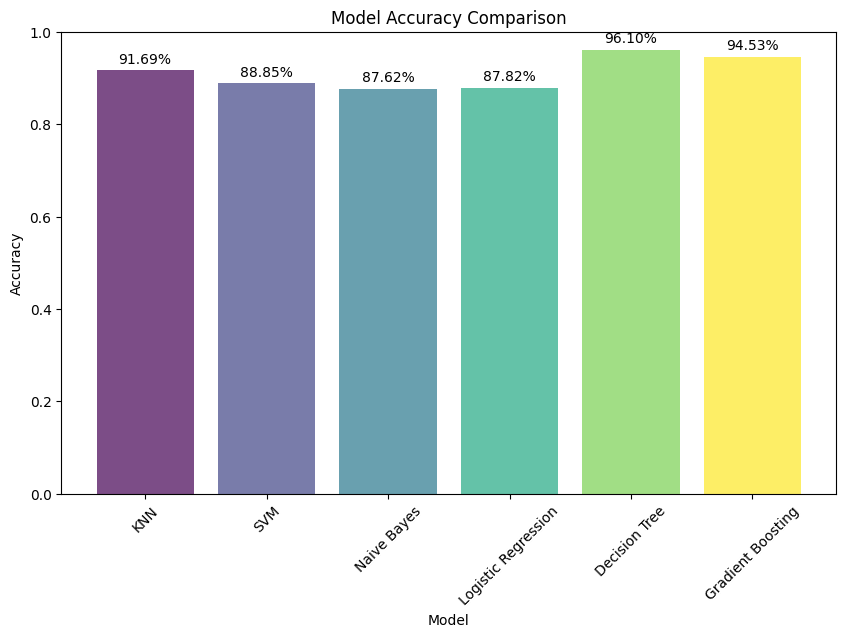

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define your models and their names
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=11),
    'Gradient Boosting': GradientBoostingClassifier()
}

model_accuracies = {}

# Train each model and store its accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    model_accuracies[name] = accuracy

# Create a list of unique colors for each model
colors = plt.cm.viridis(np.linspace(0, 1, len(model_accuracies)))

# Create a bar graph with accuracy counts
plt.figure(figsize=(10, 6))
bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), color=colors, alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Annotate accuracy counts above the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 for accuracy
plt.xticks(rotation=45)  # Rotate model names on the x-axis for better readability
plt.show()
